<h2 style="color:blue" align="center">Quantization Tutorial</h2>

Quantization is a technique to downsize a trained model so that you can deploy it on EDGE devices. In this tutorial we will,

(1) Train a hand written digits model

(2) Export to a disk and check the size of that model

(3) Use two techniques for quantization (1) post training quantization (3) quantization aware training

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-08-20 19:07:16.829033: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-20 19:07:16.837125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 19:07:17.006069: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 19:07:17.006644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 19:07:17.977046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

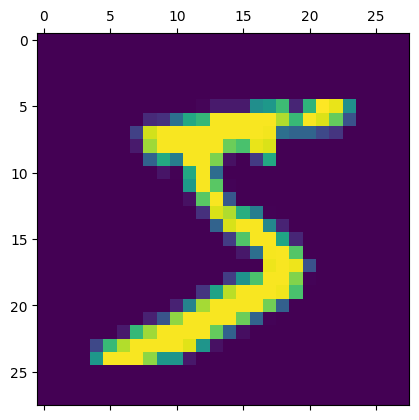

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

2023-08-20 19:07:44.351886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.2799 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1266 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0658 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 1s 779us/step - loss: 0.0520 - accuracy: 0.9842


In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 523us/step - loss: 0.0859 - accuracy: 0.9744


[0.08590775728225708, 0.974399983882904]

In [13]:
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


<h3 style='color:blue'>(1) Post training quantization</h3>

**Without quantization**

In [14]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

2023-08-20 19:08:43.593834: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-20 19:08:43.593906: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-20 19:08:43.607720: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./saved_model
2023-08-20 19:08:43.611039: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-08-20 19:08:43.611085: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: ./saved_model
2023-08-20 19:08:43.619158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-08-20 19:08:43.621336: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-20 19:08:43.651122: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: ./saved_model
2023-08-20 19:08

**With quantization**

In [15]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

2023-08-20 19:09:06.971163: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-20 19:09:06.971183: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-20 19:09:06.971313: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./saved_model
2023-08-20 19:09:06.971795: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-08-20 19:09:06.971803: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: ./saved_model
2023-08-20 19:09:06.973207: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-20 19:09:06.993036: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: ./saved_model
2023-08-20 19:09:06.998693: I tensorflow/cc/saved_model/loader.cc:314] SavedModel load for tags { serve }; Status: success: OK. Took 27380 microsecon

Read this article for post training quantization: https://www.tensorflow.org/model_optimization/guide/quantization/post_training

In [16]:
len(tflite_model)

320004

In [17]:
len(tflite_quant_model)

84880

You can see above that quantizated model is 1/4th the size of a non quantized model

In [20]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [21]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

Once you have above files saved to a disk, check their sizes. Quantized model will be obvi

<h3 style='color:blue'>(2) Quantization aware training</h3>

In [23]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten (QuantizeWrap  (None, 784)              1         
 perV2)                                                          
                                                                 
 quant_dense (QuantizeWrappe  (None, 100)              78505     
 rV2)                                                            
                                                                 
 quant_dense_1 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-traina

In [24]:
q_aware_model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0436 - accuracy: 0.9865


In [25]:
q_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 676us/step - loss: 0.0803 - accuracy: 0.9769


[0.08031246811151505, 0.9768999814987183]

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp4wpsqgbk/assets


INFO:tensorflow:Assets written to: /tmp/tmp4wpsqgbk/assets
/home/jubaer/.local/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-08-20 19:13:33.167671: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-20 19:13:33.167688: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-20 19:13:33.167823: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp4wpsqgbk
2023-08-20 19:13:33.168949: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-08-20 19:13:33.168959: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp4wpsqgbk
2023-08-20 19:13:33.174388: I tensorflow/cc/saved_model/loader.cc

In [27]:
len(tflite_qaware_model)

82736

In [26]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)